In [1]:
!pip install tensorflow

In [2]:
!pip install tensorflow matplotlib

In [4]:
pip install ipykernel

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [2]:
IMAGE_SIZE = 256
BATCH_SIZE =32
CHANNELS=3
EPOCHS=50


In [8]:
import tensorflow as tf

IMAGE_SIZE = 256
BATCH_SIZE = 32

dataset_path = r"C:\Users\muthu\Downloads\PlantVillage\PlantVillage"  # full absolute path

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

class_names = dataset.class_names
print("Classes found:", class_names)



Found 2152 files belonging to 3 classes.
Classes found: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [10]:
for images, labels in dataset.take(1):
    print(images[0].shape)



(256, 256, 3)


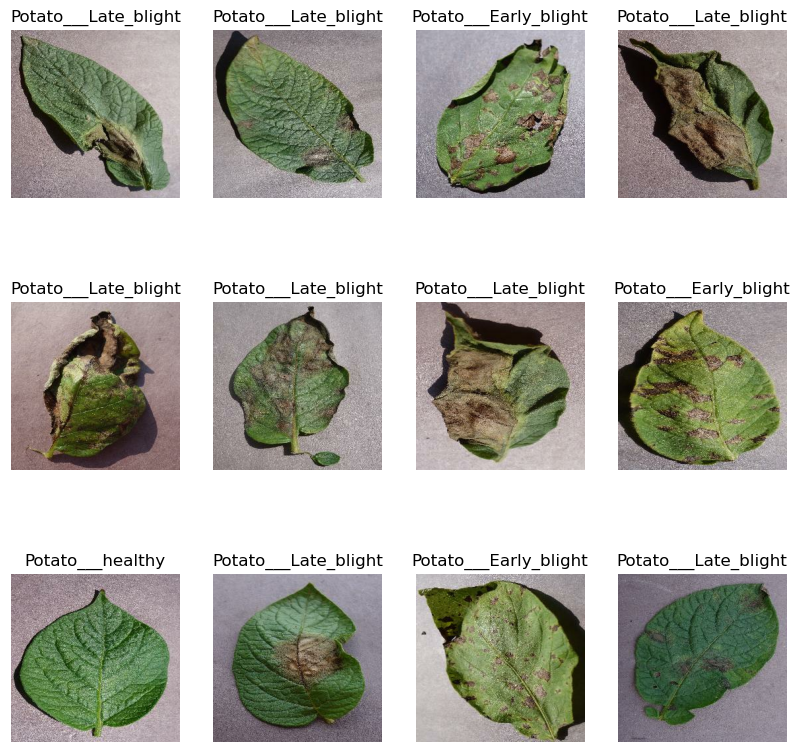

In [12]:
import matplotlib.pyplot as plt

class_names = dataset.class_names  # Make sure this is defined

plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")
plt.show()



In [14]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1,
                               test_split=0.1, shuffle=True, shuffle_size=10000):
    # Ensure the splits add up to 1
    assert (train_split + val_split + test_split) == 1, "Splits must sum to 1."

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds


In [16]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [17]:
resize_and_rescale = tf.keras.Sequential([
 tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
 tf.keras.layers.Rescaling(1.0/255),
])
data_augmentation = tf.keras.Sequential([
 tf.keras.layers.RandomFlip("horizontal_and_vertical"),
 tf.keras.layers.RandomRotation(0.2),
])


In [18]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE,
CHANNELS)
n_classes = 3


In [19]:
model = models.Sequential([
 resize_and_rescale,
 layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(64, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(64, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(64, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Flatten(),
 layers.Dense(64, activation='relu'),
 layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

c:\Users\muthu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(
 optimizer='adam',

loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
 metrics=['accuracy']
)
history = model.fit(
 train_ds,
 batch_size=BATCH_SIZE,
 validation_data=val_ds,
 verbose=1,
 epochs=5,
)
scores = model.evaluate(test_ds)
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
 #print(images_batch[0])
 first_image = images_batch[0].numpy().astype('uint8')
 first_label = labels_batch[0].numpy()


Epoch 1/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.4884 - loss: 0.9069 - val_accuracy: 0.4062 - val_loss: 0.9514
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 53s 974ms/step - accuracy: 0.6638 - loss: 0.6928 - val_accuracy: 0.7292 - val_loss: 0.5476
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.7992 - loss: 0.4490 - val_accuracy: 0.8333 - val_loss: 0.3673
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 932ms/step - accuracy: 0.8385 - loss: 0.4397 - val_accuracy: 0.8438 - val_loss: 0.3886
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 47s 875ms/step - accuracy: 0.8744 - loss: 0.3029 - val_accuracy: 0.8906 - val_loss: 0.2879
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 468ms/step - accuracy: 0.9062 - loss: 0.2250


First image to predict:


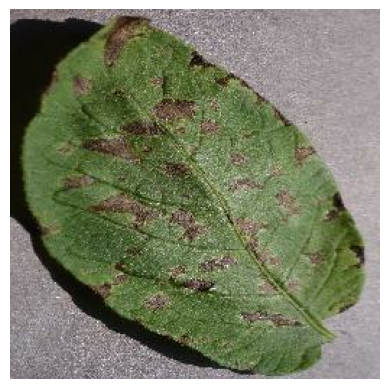

Actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted label: Potato___Early_blight
Confidence score: 0.96029896


In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Take one batch from dataset
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype("uint8")
    first_label = labels_batch[0]
    
    print("First image to predict:")
    plt.imshow(first_image)
    plt.axis("off")
    plt.show()
    
    print("Actual label:", class_names[first_label])
    
    # Predict for the whole batch
    batch_prediction = model.predict(images_batch)
    
    print("Predicted label:", class_names[np.argmax(batch_prediction[0])])
    print("Confidence score:", np.max(batch_prediction[0]))


In [25]:
def predict(model, img):
 img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
 img_array = tf.expand_dims(img_array, 0)
 predictions = model.predict(img_array)
 predicted_class = class_names[np.argmax(predictions[0])]
 confidence = round(100 * (np.max(predictions[0])), 2)
 return predicted_class, confidence


In [27]:
def predict(model, img):
 img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
 img_array = tf.expand_dims(img_array, 0)
 predictions = model.predict(img_array)
 predicted_class = class_names[np.argmax(predictions[0])]
 confidence = round(100 * (np.max(predictions[0])), 2)
 return predicted_class, confidence


In [30]:
model.save("potatoes.h5")
